The Linear Regression Model attempts to model the relationship between two variables by fitting a linear equation (a line) to observed data. In the model, one variable is considered to be an explanatory variable (X Variable), and the other is considered to be a dependent variable (Y Variable).

we are going to try to model the relationships between two financial assets, the price of a single share of Exxon Mobile stock and the price of a barrel of oil.<br>
 The question we are trying to answer is, does the explanatory variable (Oil) do a good job at predicting the dependent variable (a single share of Exxon Mobile stock.)<br>

explanatory variable (Oil) == (X Variable)
dependent variable (a single share of Exxon Mobile stock == (Y Variable)




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# load the data

In [2]:
#load the data
price_data = pd.read_excel("oil_exxon.xlsx")

#set the date column as the index
price_data.index = pd.to_datetime(price_data['date'])
#drop the old date column
price_data = price_data.drop(['date'], axis=1)


price_data.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


# Clean the Data

In [3]:
#check the data types
price_data.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [4]:
# column name is spelt incorrectly
# lets rename the columm name exon to exxon
new_column_names = {'exon_price':'exxon_price'}
price_data = price_data.rename(columns=new_column_names)
price_data.head()

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


#### check for missing values

In [5]:
display(price_data.isna().any())

#drop any missing values
price_data = price_data.dropna()
display(price_data.isna().any())

exxon_price    False
oil_price       True
dtype: bool

exxon_price    False
oil_price      False
dtype: bool

# Explore the data
helps us understand some of the following questions:

How is the data distributed?
Does there appear to be a relationship between the two variables?
Are there any outliers?
Is the data skewed?

#### Build a Scatter Plot


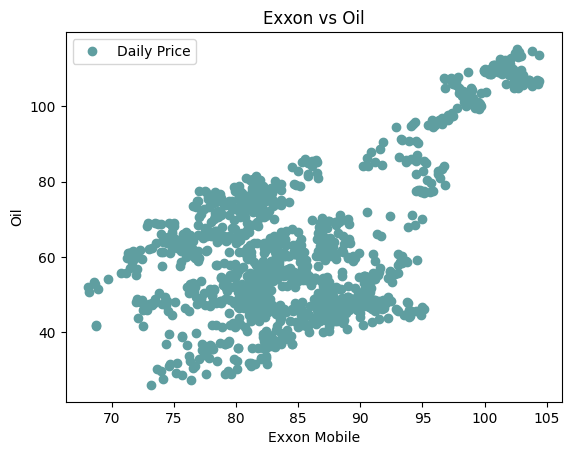

In [6]:
#define the x and y data
x = price_data['exxon_price']
y = price_data['oil_price']
plt.plot(x, y, 'o', color = 'cadetblue', label='Daily Price')
plt.title('Exxon vs Oil')
plt.xlabel('Exxon Mobile')
plt.ylabel('Oil')
plt.legend()

#### Measure the Correlation
Generally speaking, this is how we measure the strength of correlations.

Very strong relationship (|r|>0.8 =>)<br>
Strong relationship (0.6≤|r|)<br>
Moderate relationship (0.4≤|r|)<br>
Weak relationship (0.2≤|r|)<br>
Very weak relationship (|r|)

             exxon_price  oil_price
exxon_price      1.00000    0.60132
oil_price        0.60132    1.00000


<AxesSubplot: >

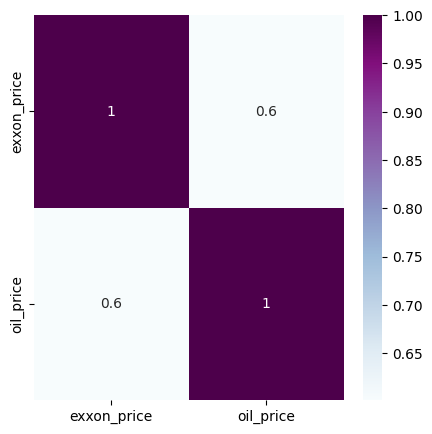

In [7]:
#lets measure the correlation
corr = price_data.corr()
print(corr)
plt.figure(figsize=(5,5))
sns.heatmap(corr, annot=True, cmap='BuPu')


### Create statistical summary

In [8]:
price_data.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


### Checking for outliers and Skewness

array([[<AxesSubplot: title={'center': 'exxon_price'}>,
        <AxesSubplot: title={'center': 'oil_price'}>]], dtype=object)

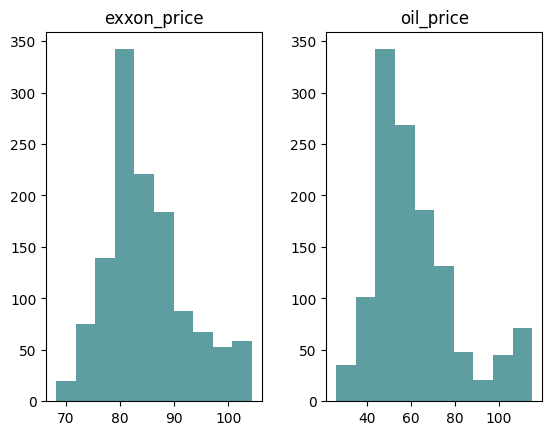

In [9]:
price_data.hist(grid = False, color = 'cadetblue')

However, we probably should verify this by taking some measurements. Two good metrics we can use are the kurtosis and skew, where kurtosis measure the height of our distribution and skew measures whether it is positively or negatively skewed. We will use the scipy.stats module to do the measurements.


Kurtosis

Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.
Skewness

If skewness is less than −1 or greater than +1, the distribution is highly skewed.
If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
If skewness is between −½ and +½, the distribution is approximately symmetric.

In [10]:
#calculate the excess kurtosis using the fisher method.
#the alternative is pearson which calculates regular kurtosis
#with the fisher method we want our kurtosis to be closer to zero, with the
# pearson method we want our kurtosis to closer to 3
exxon_kurtosis = kurtosis(price_data['exxon_price'], fisher = True)
oil_kurtosis = kurtosis(price_data['oil_price'], fisher = True)

#calculate the skewness
exxon_skew = skew(price_data['exxon_price'])
oil_skew = skew(price_data['oil_price'])

display("Exxon Excess Kurtosis: {:.2}".format(exxon_kurtosis))  # this looks fine
display("Oil Excess Kurtosis: {:.2}".format(oil_kurtosis))      # this looks fine

display("Exxon Skew: {:.2}".format(exxon_skew))          # moderately skewed
display("Oil Skew: {:.2}".format(oil_skew)) 





'Exxon Excess Kurtosis: 0.088'

'Oil Excess Kurtosis: 0.53'

'Exxon Skew: 0.66'

'Oil Skew: 1.0'

##### kurtosistest() and skewtest()

In [11]:
#perform kurtosis test()
display('Exxon')
display(stats.kurtosistest(price_data['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_data['oil_price']))

#skew test
display('Exxon')
display(stats.skewtest(price_data['exxon_price']))
display('Oil')
display(stats.skewtest(price_data['oil_price']))


'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

## Build the Model

### Split the Data

In [12]:
#define our input variable (x) and output variable
Y = price_data.drop('oil_price', axis = 1)
X = price_data[['oil_price']]

## Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1 )

#### Create and fit the Model

In [13]:
#create a Linear Regression model object:
regression_model = LinearRegression()

#pass through the X_train and y_train data set
regression_model.fit(X_train, y_train)

LinearRegression()

##### Explore the Output
First, we can check the coefficient of each independent variable in our model. In this case, it is just the oil price. After that let us take a look at the intercept of our regression formula.

In [14]:
#lets get the intercept and coefficient of our model
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]

print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))




The Coefficient for our model is 0.23
The intercept for our model is 70.55


Interpreting the coefficient, we would say that a single unit increase in oil is associated with a 0.23 increase in the price of Exxon Mobile stock. We are NOT CLAIMING CAUSATION, just association.

#### Taking a single prediction


In [15]:
prediction = regression_model.predict([[67.33]])
predicted_value = prediction[0][0]
print("The predicted value is {:.4}".format(predicted_value))


The predicted value is 86.0


/home/gitonga/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


To interpret the output, we would say that given a barrel of oil for 67.33 we would predict Exxon Mobile to be trading for 85.95.

#### Making Multiple Predictions


In [16]:
y_predict = regression_model.predict(X_test)
y_predict[:5]

array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

# Evaluating the model
we are going to recreate our same model using the statsmodel.api library. The reason why is that they have numerous built-in functions that make calculating metrics like confidence intervals and p-values a breeze. The output from the statsmodel.api will not be identical to our sklearn library but it will be very close.

In [18]:
#define our input
X2 = sm.add_constant(X)

#create a OLS model
model = sm.OLS(Y, X2)

#fit the data
est = model.fit()

# Confidence intervals
 Keep in mind that by default that the calculated using 95% intervals. We interpret this by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

In [20]:
# make some confidence intervals, 95% by default.
est.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


Interpreting the output above, we would say that with 95% confidence the oil_price coefficient exists between 0.214 & 0.248.

# Hypothesis Testing
Null Hypothesis: There is no relationship between the price of oil and the price of Exxon.

The coefficient equals 0.
Alternative Hypothesis: There is a relationship between the price of oil and the price of Exxon.

The coefficient does not equal to 0.
If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [21]:
# estimate the p-values.
est.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.

# Model Fit
We can examine how well our data fit the model, so we will take y_predictions and compare them to our y_actuals these will be our residuals. From here we can calculate a few metrics to help quantify how well our model fits the data. Here are a few popular metrics:

Mean Absolute Error (MAE): Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

Mean Squared Error (MSE): Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

Root Mean Squared Error (RMSE): Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [22]:
#calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error.
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))





MSE 38.8
MAE 5.05
RMSE 6.23


# R-Squared
The R-Squared metric provides us a way to measure the goodness of fit or how well our data fits the model. The higher the R-Squared metric, the better the data fit our model. However, we have to know the limitations of R-Square. One limitation is that R-Square increases as the number of feature increases in our model, so it does not pay to select the model with the highest R-Square. A more popular metric is the adjusted R-Square which penalizes more complex models. Let us calculate both.


In [23]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))


R2: 0.36


The R-squared is generally of secondary importance unless the main concern is using the regression equation to make accurate predictions. It boils down to the domain-specific problem, and many people would argue an R-Square of .36 is great for stocks because it is hard to control for all the external factors, while others may not agree.


### Create a Summary of the Model Output
Sklearn does not have a good way of creating this output so we would have to calculate all the metrics ourselves. Let us avoid this and use the statsmodel.api library as we can create the same model we did up above, but we can also leverage the summary() method to create an output for us. Some of the metrics might differ slightly, but they generally should be the same

In [24]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Mon, 14 Nov 2022   Prob (F-statistic):          1.42e-123
Time:                        08:36:05   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

# Plot the Residuals
It's good to see how the residulas are distributed because they should be normally distributed.



array([[<AxesSubplot: title={'center': 'exxon_price'}>]], dtype=object)

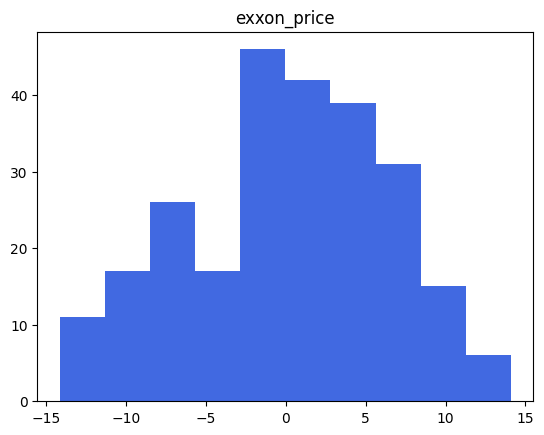

In [25]:
# Grab the residuals and then call the hist() method
(y_test - y_predict).hist(grid = False, color = 'royalblue')

## Plotting our Line
We have this beautiful model, but we cannot see it. Let us create a graph where we have our data and our linear regression line on our graph. We should also highlight some of our key metrics

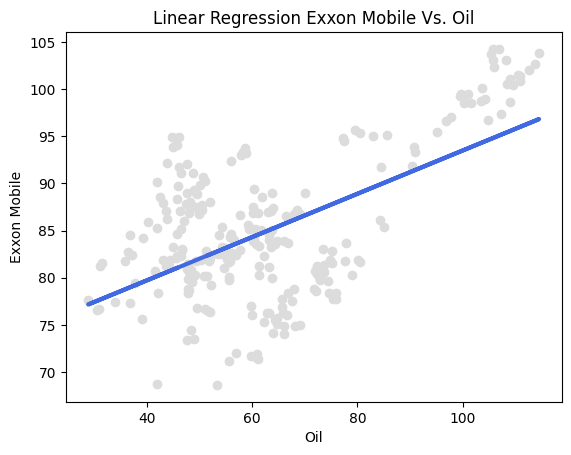

Oil coefficient:0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


In [28]:
#plot outputs
plt.scatter(X_test, y_test, color = 'gainsboro', label = 'Price')
plt.plot(X_test, y_predict, color = 'royalblue', linewidth = 3, linestyle = '-', label = 'Regression Line')
plt.title("Linear Regression Exxon Mobile Vs. Oil")
plt.xlabel("Oil")
plt.ylabel("Exxon Mobile")
plt.show()

# The coefficients
print('Oil coefficient:' + '\033[1m' + '{:.2}''\033[0m'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(model_mse))

# The mean squared error
print('Root Mean squared error: ' + '\033[1m' + '{:.4}''\033[0m'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: '+ '\033[1m' + '{:.2}''\033[0m'.format(r2_score(y_test,y_predict)))


### Save the Model for future use

In [29]:
import pickle

#pickle the model
with open('my_linear_regression.sav', 'wb') as f:
    pickle.dump(regression_model,f)

#load it back in
with open('my_linear_regression.sav', 'rb') as f:
    regression_model_2 = pickle.load(f)

regression_model_2.predict([[67.33]])

/home/gitonga/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[85.99798304]])